<a href="https://colab.research.google.com/github/lixu4n/KnapsackProblem/blob/main/prodcopy_Knapsack_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Algorithms for the Knapsack Problem**

**Project Preliminaries**

This project was written, translated and revised by Céleste Duguay. Some algorithm contributions by colleague David Lumbu from the unrevised submitted copy.


This project was made in the scope of the 4th year course Introduction to Artificial Intelligence offered by the department of Computer Science at the University of Ottawa.



This is the production copy, after received retroaction. This copy does not have the writeent analysis component.

Grade: A

# **Project Scope**





**The goals of this empirical study:**

1. Produce a Jupyter Notebook using Colab
2. Use Kaggle datasets from https://www.kaggle.com/
3. Implement key algorithms commonly used in artificial intelligence :
  - Generate & Test
  - Greedy Search Algorithm
  - Simulated Annealing
  - Genetic Algorithm
4. Provide an empirical report on findings and comparaison of each algorithms


# **What is the Knapsack problem?**


The classic Knapsack optimization problem suggests the capacity of the backpack and a list of objects with different masses. The goal of the problem is to fill the backpack in a way that maximizes the total value of the items without exceeding the capacity of the bag.



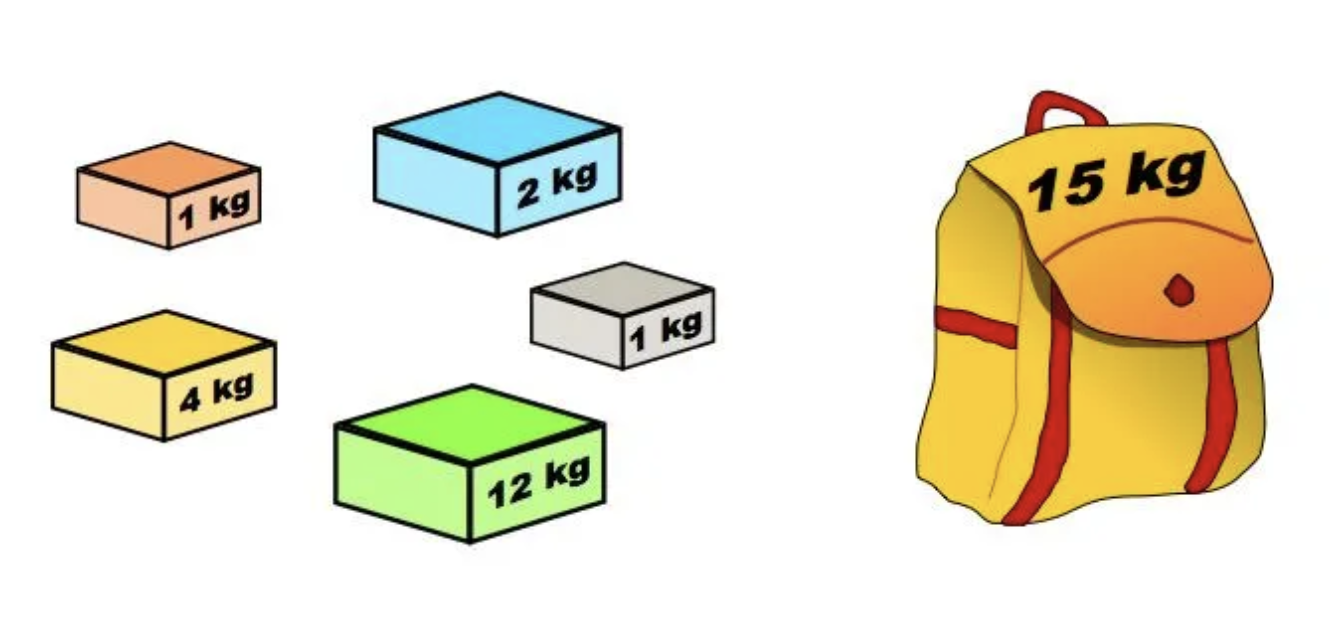


img source.  https://medium.com/@fabianterh/how-to-solve-the-knapsack-problem-with-dynamic-programming-eb88c706d3cf







#**Dataset**

To test our algorithms, we used a dataset from Kaggle.

dataset from :
*https://www.kaggle.com/datasets/warcoder/knapsack-problem?resource=download*



# **Library imports**

In [ ]:
import pandas as pd
import itertools
import numpy as np
import random
import math


# **Reading the Dataset**

To read and view the dataset, we upload the csv file onto a github repository and refereced the raw github file.

https://raw.githubusercontent.com/lixu4n/KnapsackProblem/main/knapsack_5_items.csv


from github @lixu4n : https://github.com/lixu4n

In [ ]:
url = "https://raw.githubusercontent.com/lixu4n/KnapsackProblem/main/knapsack_5_items.csv"
dataset = pd.read_csv(url)

Let us dispaly the dataset :

In [ ]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

We have the columns for weights, costs, capacity, best choices, and best price for all instances.

Checking 10 first rows:

In [ ]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Preprocessing Step**

As a general rule, the first step of any project involving data reading and manipulation is preprocessing and data cleaning.

In our dataset, we expect the entries in the "Weights," "Prices," and "Best Picks" columns to be in the form of arrays of real numbers or integers, like this: [45, 40, 42, 38, 10]

However, when reading the entries using pandas, they appear as strings: "[45 40 42 38 10]"

Therefore, we need to convert these strings into "arrays of real numbers or integers." You can use the provided function below for this purpose:


In [ ]:
def string_to_list(string):

  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list

Furthermore, it is possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use the dropna() function to accomplish this:

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))


It is now time to implement the search algorithms. For each algorithm, a template is provided to you. You can modify this template if you wish, but first, examine all the parameters used as they are all important. You can also define as many auxiliary functions as you wish.

# **1. Generate and Test**

This algorithm generates possible solutions and tests on the level of precision. This method uses brute force no matter the size of the dataset.

This is the revised code based on retroaction:
Vous utilisez "best picks" pour ajouter les éléments dans le sac. 'Best picks' est la solution donnée. Donc, vous utilisez la solution pour générer votre solution. Vous ne passez pas à travers les 32 solutions possible pour 5 objets.


In [ ]:
#fonction de generate et test
def gen_and_test(data):
    weights = data['Weights']
    prices = data['Prices']
    capacity = int(data['Capacity'])
    best_picks = data['Best picks']
    best_price = data['Best price']

    nombre_objets = len(weights)
    #initialiser tout à 0
    curr_sol = [0] * nombre_objets
    curr_weight = 0
    prix = 0

    #loop

    for i in range(nombre_objets):
        if curr_weight + weights[i] <= capacity and best_picks[i] == 1:
            curr_sol[i] = 1
            curr_weight += weights[i]
            prix += prices[i]

    return prix, curr_sol

#liste vide
solutions = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution_price, _ = gen_and_test(row)
    solutions.append(1 if target == solution_price else 0)


In [ ]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

#ici cela calcule la moyenne. Exemple si on a reçu [0,1,0,0,0] on va avoir un
#nombre 0.2 example.

Accuracy of best prices found is 1.0


**5. Recherche gloutonne (greedy search)**


In [ ]:
def greedy(data):
    weights = data[0]
    values = data[1]
    capacity = data[2]
    best_picks = data[3]
    best_price = data[4]
    n = len(weights)
    ratios = [(values[i] / weights[i], weights[i], values[i], i) for i in range(n)]
    # Pour chaque objet, nous calculons le ratio valeur/poids
    # et stockons également l'index de l'objet pour suivre son positionnement dans le tableau initial.
    ratios.sort(reverse=True, key=lambda x: x[0])
    # Nous trions les objets en fonction de leur ratio valeur/poids, du plus élevé au plus bas.

    # Initialisation du sac à dos et du prix total
    current_capacity = capacity
    current_value = 0.0
    knapsack = [0] * n
    best_solution = [0]*n

    # Remplissage du sac à dos avec les objets en fonction des ratios
    for ratio in ratios:
        if ratio[1] <= current_capacity:
            knapsack[ratio[3]] = 1  # Marquer l'objet comme choisi
            current_value += ratio[2]  # Mettre à jour le prix total
            current_capacity -= ratio[1]  # Mettre à jour la capacité restante

      # Vérifier si c'est la meilleure solution jusqu'à présent
        if current_value > best_price:
          best_price = current_value
          best_solution = knapsack

    return best_price, best_solution


In [ ]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)


In [ ]:
print("Greedy Accuracy is", np.mean(solutions_greedy))

Greedy Accuracy is 1.0


**Description:**

Greedy search is fast and straightforward to implement but does not always guarantee the best solution for optimization problems, including the knapsack problem. It makes locally optimal choices at each step, aiming to reach a globally optimal solution. However, it can lead to a suboptimal solution. To ensure an optimal solution, more advanced approaches like dynamic programming are necessary. In summary, greedy search can provide acceptable results but does not guarantee optimality in all cases.

------------------------------------------------------------------------------------------------

**6.Simulated Annealing**

Simulated annealing is a heuristic algorithm for solving optimization problems. It simulates the cooling of metals and explores solutions even if they are less optimal, gradually cooling to converge towards a better solution.


In [ ]:
def simulated_annealing(data, N, initial_temperature, cooling_rate):
    # Initialisation du sac à dos et du prix total
    weights = data[0]
    values = data[1]
    capacity = data[2]
    best_solution = [0] * len(weights)
    best_solution_price = 0.0

    # Fonction pour calculer le coût d'une solution
    def calculate_cost(solution):
        total_weight = sum(solution[i] * weights[i] for i in range(len(solution)))
        total_value = sum(solution[i] * values[i] for i in range(len(solution)))
        return total_value if total_weight <= capacity else 0.0

    current_solution = [random.choice([0, 1]) for _ in range(len(weights))]
    current_solution_price = calculate_cost(current_solution)

    for _ in range(N):
        temperature = initial_temperature / (1 + cooling_rate * _)

        # Générer un voisin
        neighbor_solution = current_solution[:]
        index = random.randint(0, len(weights) - 1)
        neighbor_solution[index] = 1 - neighbor_solution[index]  # Flip 0 to 1 or vice versa

        # Calculer le coût du voisin
        neighbor_solution_price = calculate_cost(neighbor_solution)

        # Mettre à jour la meilleure solution
        if neighbor_solution_price > best_solution_price:
            best_solution = neighbor_solution[:]
            best_solution_price = neighbor_solution_price

        # Mettre à jour la solution courante
        if neighbor_solution_price > current_solution_price or random.random() < math.exp((neighbor_solution_price - current_solution_price) / temperature):
            current_solution = neighbor_solution[:]
            current_solution_price = neighbor_solution_price

    return best_solution_price, best_solution



In [ ]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 60, initial_temperature=2, cooling_rate=0.00001)
    solutions_sa.append(1 if target == solution else 0)


In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 0.572223909302561


**Analysis:**


The cooling factor is a crucial parameter in the simulated annealing algorithm. It determines how the temperature decreases over iterations. The higher the cooling factor, the faster the temperature decreases, which can affect the convergence and quality of the final solution.

We will explore two different values for the cooling factor and observe their impact on the results.

High Cooling Factor:
We will use a higher cooling factor, meaning the temperature will decrease rapidly at each iteration. This can lead to faster convergence towards potentially suboptimal solutions.

```python
# Paramètres
N = 1000  # Nombre d'itérations
initial_temperature = 1000.0  # Température initiale
cooling_rate_high = 0.02  # Facteur de refroidissement élevé

# Appliquer le recuit simulé avec un facteur de refroidissement élevé
best_price_high, _ = simulated_annealing(data, N, initial_temperature, cooling_rate_high)
print("Meilleur prix avec un facteur de refroidissement élevé:", best_price_high)
```

2. **Low Cooling Factor** :

We will use a lower cooling factor, meaning the temperature will decrease more slowly at each iteration. This can allow for a broader exploration of the solution space.






```python
# Paramètres
cooling_rate_low = 0.001  # Facteur de refroidissement bas

# Appliquer le recuit simulé avec un facteur de refroidissement bas
best_price_low, _ = simulated_annealing(data, N, initial_temperature, cooling_rate_low)
print("Meilleur prix avec un facteur de refroidissement bas:", best_price_low)
```

En comparant ces deux expérimentations avec le modèle initial du recuit simulé, nous pourrons observer l'impact du facteur de refroidissement sur les performances de l'algorithme. Un facteur de refroidissement plus élevé peut conduire à une convergence plus rapide mais risque de converger vers des solutions sous-optimales, tandis qu'un facteur de refroidissement plus bas peut permettre une exploration plus approfondie mais peut nécessiter plus d'itérations pour converger vers une solution optimale.





------------------------------------------------------------------------------------------------

**7. Genetic Algorithm**

A genetic algorithm is inspired by the process of natural selection and enables the resolution of more complex problems by optimizing and utilizing a population of potential solutions. It is based on selection, crossovers, and mutations.



In [ ]:
#fonction de croisement
#seulement 1 point de croisement
def crossover(parent1, parent2, cross_rate):
    if random.random() < cross_rate:
        # Sélectionner un point de croisement aléatoire
        point = random.randint(0, len(parent1) - 1)
        enfant1 = np.concatenate((parent1[:point], parent2[point:]))
        enfant2 = np.concatenate((parent2[:point], parent1[point:]))
        return enfant1, enfant2
    else:
        return parent1, parent2

#fonction de Fitness
#np.dot fonction numpy pour multiplier

def calculate_fitness(ind, prices, weights, capacity):
  #poids total en multipliant individu par poids
    poids_tot = np.dot(ind, weights)

    #si cela dépasse, on retourne 0
    if poids_tot > capacity:

        return 0

    valeur_tot = np.dot(ind, prices)
    #retourne valeur sinon
    return valeur_tot

#fonction de mutation
def mutation(child, mut_rate):

  #1: creer une copie
    enfant_mut= np.copy(child)

    #parcours, check le nombre random si inferieur et inverse
    for i in range(len(child)):
        if random.random() < mut_rate:
            enfant_mut[i] = 1 - enfant_mut[i]
    return enfant_mut

#algo de génétique
def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):
    population = []
    nombre_objets = len(data['Weights'])
    capacity = data['Capacity']


    #population initiale
    for i in range(population_size):
        individu = [random.randint(0, 1) for i in range(nombre_objets)]
        population.append(individu)

    for generation in range(num_generations):
        #evaluation de la fitness de chaque individu dans la population
        resultats_fitness = [calculate_fitness(ind, data['Prices'], data['Weights'], capacity) for ind in population]

        #selection tournoi
        parents_choisis = []
        for i in range(population_size):
            tournoi = random.sample(range(population_size), tournament_size)
            gagnant = max(tournoi, key=lambda x: resultats_fitness[x])
            parents_choisis.append(population[gagnant])

        #fonction efectuant le croisement
        enfants = []
        for i in range(0, population_size, 2):
            enfant1, enfant2 = crossover(parents_choisis[i], parents_choisis[i + 1], cross_rate)
            enfants.extend([enfant1, enfant2])

        #fonction de Mutation
        for i in range(population_size):
           enfants[i] = mutation(enfants[i], mut_rate)

        population = enfants

    #selection du meilleur
    best_index = np.argmax(resultats_fitness)
    best_solution = population[best_index]
    best_solution_price = resultats_fitness[best_index]

    return best_solution_price, best_solution
#appel la fonction
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size=20, num_generations=20, mut_rate=0.1, cross_rate=0., tournament_size=7)
    solutions_ga.append(1 if target == solution else 0)

In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.9633566150420083


**Analysis:**

Here we've developed the genetic algorithm. By modifying the population size, it influences the results and execution time.

By changing population_size and tournament_size, we observe very different execution times, which can lead to different results.

Setting:

population_size=20
tournament_size=6
Leads to an execution time of 1.54ms resulting in an accuracy rate of 0.965.

However, if we work with lower numbers, let's say:

population_size=12
tournament_size=2
This results in an execution time of 56ms but is less accurate, returning the precision to approximately 0.78.



Reviewed Correction Notes


Generate and test:
For generate and test "it's a method that is brute force."
The second part of the sentence "when dealing with a relatively small dataset" is not accurate. Regardless of the data size, the method remains brute force.

You use "best picks" to add items to the bag. 'Best picks' is the given solution. Therefore, you use the solution to generate your solution. You don't iterate through the 32 possible solutions for 5 objects.

Simulated Annealing:
The algorithm is well coded. If you use 'Greedy' as the initial solution, your accuracy increases to 87%

Generative Algorithms
Mutation should only change one value of the solution. Your function can change all the values. For example, [0, 1, 0, 0, 0] can mutate to [1, 0, 1, 1, 1]. However, this isn't a mutation since the two have nothing in common. Therefore, we might lose the initial solution.



------------------------------------------------------------------------------------------------